In [1]:
import cv2
import os
from matplotlib import  pyplot as plt 
import seaborn as sns
import tensorflow as tf
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import itertools
import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Define function for loading dataset and displaying some sample 

### In this work, we are using only thumb finger left and rigth from our dataset

In [3]:
def gender_handSide_Transpose(label):
  if label == 'Right' or label == 'M':
    return 1
  
  return 0
  

def load_datasets(dataset_path):

  _columns = ('images', 'gender', 'hand', 'finger', 'id_num')
  dataset = pd.DataFrame(columns = _columns)

  path_folder = dataset_path + '/' 
 
  for filename in os.listdir(dataset_path):
    
    pers_id = str.split(str(filename), '__')
    autre = str.split(pers_id[1], '.')
    finger_infos = str.split(autre[0], '_')

    path_file = path_folder + filename
    img = cv2.imread(path_file, 0)
    img = cv2.resize(img, (96, 103))

    if finger_infos[2] == 'thumb':
      dic = dict()
      dic['images'] = img
      dic['id_num'] = int(pers_id[0])
      dic['gender'] = finger_infos[0]
      dic['hand'] = finger_infos[1]
      dic['finger'] = finger_infos[2]
      
      dataset = dataset.append(dic, ignore_index=True)

  dataset = dataset.sample(frac=1, random_state=42).reset_index(drop=True)
  print('Data infos: {}'.format(dataset.shape))

  return dataset

In [4]:
def displaySample(data = None, nb_line = None,nb_columns = None):
  fig, ax = plt.subplots(nb_columns, nb_line, sharex=True, sharey=True, figsize=(10,10))
  k = 0
  for i in range(nb_line):
    for j in range(nb_columns):
      ax[i,j].imshow(data['images'][j + k], cmap="gray")
      ax[i,j].set_title(str(data['id_num'][j + k]) + '__' + data['gender'][j + k]
                        + '_' + data['hand'][j + k] + '_' + data['finger'][j + k])
      
    k = k + nb_columns

  plt.show()



def displaySampleFeatures(data = None, nb_line = None,nb_columns = None, name=None):
    fig, ax = plt.subplots(nb_columns, nb_line, sharex=True, sharey=True, figsize=(10,10))
    k = 0
    for i in range(nb_line):
      for j in range(nb_columns):
        ax[i,j].imshow(data[name][j + k], cmap="gray")
        ax[i,j].set_title(str(data['id_num'][j + k]) + '__' + data['gender'][j + k]
                          + '_' + data['hand'][j + k] + '_' + data['finger'][j + k])
        
      k = k + nb_columns

    plt.show()

# UnZip file dataset from drive using zipfile library or unzip

###### We will use only thumb fingerprint

In [5]:
#import zipfile

#_zipfile = zipfile.ZipFile('/content/drive/MyDrive/Colab Notebooks/FingerPrint_Recognition/SOCOFing.zip', 'r')
#_zipfile.extractall('/content/drive/MyDrive/Colab Notebooks/FingerPrint_Recognition/')
#_zipfile.close( )


#!unzip -uq "/content/drive/MyDrive/Colab Notebooks/FingerPrint_Recognition/SOCOFing.zip" -d "/content/drive/MyDrive/Colab Notebooks/FingerPrint_Recognition/"

# Load real fingerprint dataset

#### synthetically altered versions of these fingerprints are provided with three different levels of alteration for obliteration, central rotation, and z-cut using the STRANGE toolbox.

#### Load real dataset

In [6]:
#real_data= load_datasets('/content/drive/MyDrive/Colab Notebooks/FingerPrint_Recognition/SOCOFing/Real')
real_data = pd.read_pickle('/content/drive/MyDrive/Colab Notebooks/FingerPrint_Recognition/Data/real_data.pkl')
real_data.shape

(1200, 5)

In [7]:
# save in pickle format
#real_data.to_pickle('/content/drive/MyDrive/Colab Notebooks/FingerPrint_Recognition/Data/real_data.pkl')

In [8]:
real_data.head(100)

images gender  ... finger id_num
0   [[160, 160, 160, 160, 160, 160, 160, 160, 160,...      F  ...  thumb    173
1   [[160, 160, 160, 160, 160, 160, 160, 160, 160,...      F  ...  thumb    201
2   [[160, 160, 160, 160, 160, 160, 160, 160, 160,...      M  ...  thumb    564
3   [[160, 160, 160, 160, 160, 160, 160, 160, 160,...      M  ...  thumb    370
4   [[160, 160, 160, 160, 160, 160, 160, 160, 160,...      F  ...  thumb     56
..                                                ...    ...  ...    ...    ...
95  [[160, 160, 160, 160, 160, 160, 160, 160, 160,...      M  ...  thumb    306
96  [[160, 160, 160, 160, 160, 160, 160, 160, 160,...      M  ...  thumb    409
97  [[160, 160, 160, 160, 160, 160, 160, 160, 160,...      F  ...  thumb    240
98  [[160, 160, 160, 160, 160, 160, 160, 160, 160,...      M  ...  thumb    473
99  [[160, 160, 160, 160, 160, 160, 160, 160, 160,...      F  ...  thumb    572

[100 rows x 5 columns]

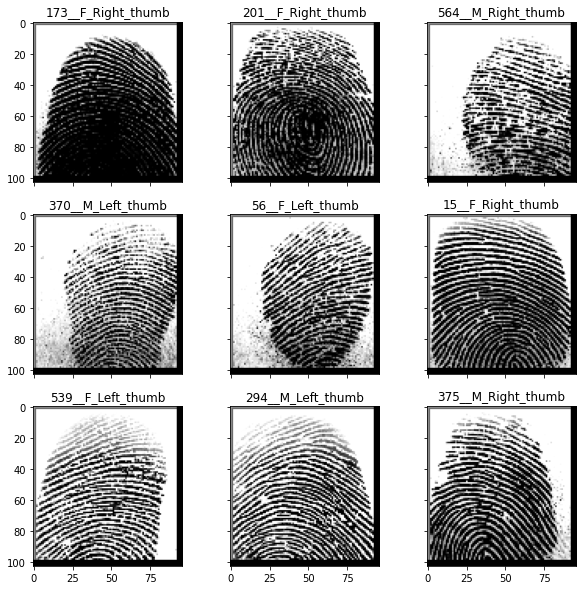

In [9]:
displaySample(data=real_data, nb_line=3, nb_columns=3)

### Load altered fingerprint dataset (easy altered)

In [10]:
#easy_altered_data = load_datasets('/content/drive/MyDrive/Colab Notebooks/FingerPrint_Recognition/SOCOFing/Altered/Altered-Easy')
easy_altered_data = pd.read_pickle('/content/drive/MyDrive/Colab Notebooks/FingerPrint_Recognition/Data/easy_altered_data.pkl')
easy_altered_data.shape

(3585, 5)

In [11]:
# save in pickle format
#easy_altered_data.to_pickle('/content/drive/MyDrive/Colab Notebooks/FingerPrint_Recognition/Data/easy_altered_data.pkl')

In [12]:
easy_altered_data.head(100)

images gender  ... finger id_num
0   [[160, 160, 160, 160, 160, 160, 160, 160, 160,...      M  ...  thumb    193
1   [[160, 160, 160, 160, 160, 160, 160, 160, 160,...      F  ...  thumb    173
2   [[160, 160, 160, 160, 160, 160, 160, 160, 160,...      M  ...  thumb    509
3   [[160, 160, 160, 160, 160, 160, 160, 160, 160,...      M  ...  thumb     97
4   [[160, 160, 160, 160, 160, 160, 160, 160, 160,...      M  ...  thumb    212
..                                                ...    ...  ...    ...    ...
95  [[160, 160, 160, 160, 160, 160, 160, 160, 160,...      M  ...  thumb    100
96  [[160, 160, 160, 160, 160, 160, 160, 160, 160,...      M  ...  thumb    264
97  [[160, 160, 160, 160, 160, 160, 160, 160, 160,...      M  ...  thumb    408
98  [[160, 160, 160, 160, 160, 160, 160, 160, 160,...      F  ...  thumb    574
99  [[160, 160, 160, 160, 160, 160, 160, 160, 160,...      M  ...  thumb    443

[100 rows x 5 columns]

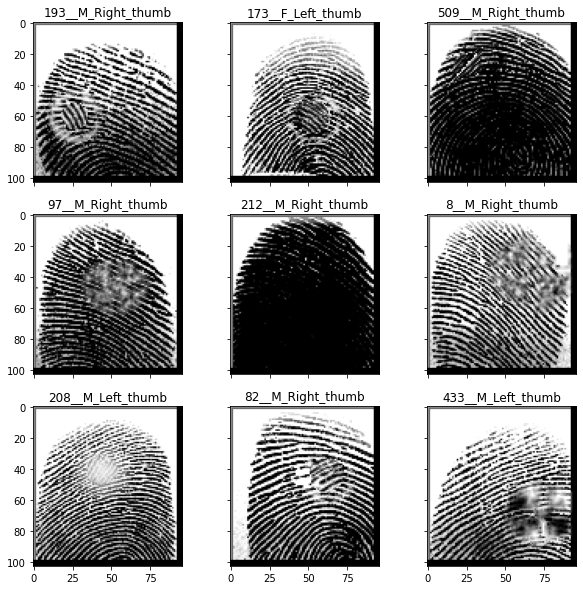

In [13]:
displaySample(data=easy_altered_data, nb_line=3, nb_columns=3)

### load altered fingerprint dataset (medium altered)

In [14]:
#medium_altered_data = load_datasets('/content/drive/MyDrive/Colab Notebooks/FingerPrint_Recognition/SOCOFing/Altered/Altered-Medium')
medium_altered_data = pd.read_pickle('/content/drive/MyDrive/Colab Notebooks/FingerPrint_Recognition/Data/medium_altered_data.pkl')
medium_altered_data.shape

(3459, 5)

In [15]:
# save in pickle format
#medium_altered_data.to_pickle('/content/drive/MyDrive/Colab Notebooks/FingerPrint_Recognition/Data/medium_altered_data.pkl')

In [16]:
medium_altered_data.head(100)

images gender  ... finger id_num
0   [[160, 160, 160, 160, 160, 160, 160, 160, 160,...      M  ...  thumb    513
1   [[160, 160, 160, 160, 160, 160, 160, 160, 160,...      M  ...  thumb    552
2   [[160, 160, 160, 160, 160, 160, 160, 160, 160,...      M  ...  thumb     23
3   [[160, 160, 160, 160, 160, 160, 160, 160, 160,...      M  ...  thumb    347
4   [[160, 160, 160, 160, 160, 160, 160, 160, 160,...      F  ...  thumb     25
..                                                ...    ...  ...    ...    ...
95  [[160, 160, 160, 160, 160, 160, 160, 160, 160,...      M  ...  thumb    495
96  [[160, 160, 160, 160, 160, 160, 160, 160, 160,...      M  ...  thumb    138
97  [[160, 160, 160, 160, 160, 160, 160, 160, 160,...      F  ...  thumb    550
98  [[160, 160, 160, 160, 160, 160, 160, 160, 160,...      M  ...  thumb    583
99  [[160, 160, 160, 160, 160, 160, 160, 160, 160,...      M  ...  thumb     65

[100 rows x 5 columns]

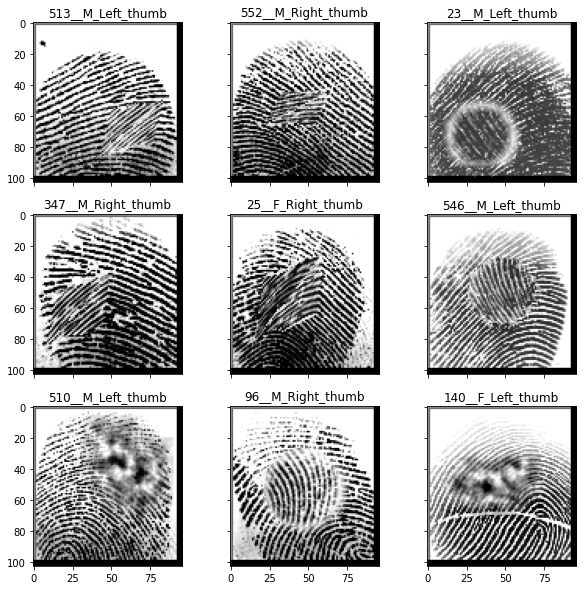

In [17]:
displaySample(data=medium_altered_data, nb_line=3, nb_columns=3)

### load altered fingerprint dataset (hard altered)

In [18]:
#hard_altered_data = load_datasets('/content/drive/MyDrive/Colab Notebooks/FingerPrint_Recognition/SOCOFing/Altered/Altered-Hard')
hard_altered_data = pd.read_pickle('/content/drive/MyDrive/Colab Notebooks/FingerPrint_Recognition/Data/hard_altered_data.pkl')
hard_altered_data.shape

(3084, 5)

In [19]:
# save in pickle format
#hard_altered_data.to_pickle('/content/drive/MyDrive/Colab Notebooks/FingerPrint_Recognition/Data/hard_altered_data.pkl')

In [20]:
hard_altered_data.head(100)

images gender  ... finger id_num
0   [[160, 160, 160, 160, 160, 160, 160, 160, 160,...      M  ...  thumb    408
1   [[160, 160, 160, 160, 160, 160, 160, 160, 160,...      M  ...  thumb    200
2   [[160, 160, 160, 160, 160, 160, 160, 160, 160,...      M  ...  thumb    322
3   [[160, 160, 160, 160, 160, 160, 160, 160, 160,...      M  ...  thumb    546
4   [[160, 160, 160, 160, 160, 160, 160, 160, 160,...      M  ...  thumb    347
..                                                ...    ...  ...    ...    ...
95  [[160, 160, 160, 160, 160, 160, 160, 160, 160,...      M  ...  thumb    520
96  [[160, 160, 160, 160, 160, 160, 160, 160, 160,...      M  ...  thumb    546
97  [[160, 160, 160, 160, 160, 160, 160, 160, 160,...      M  ...  thumb     52
98  [[160, 160, 160, 160, 160, 160, 160, 160, 160,...      M  ...  thumb    434
99  [[160, 160, 160, 160, 160, 160, 160, 160, 160,...      M  ...  thumb    259

[100 rows x 5 columns]

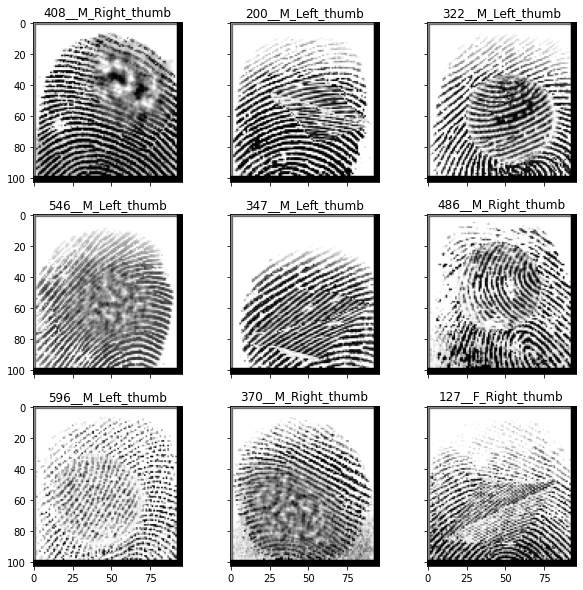

In [21]:
displaySample(data= hard_altered_data, nb_line=3, nb_columns=3)

### Load personal data


In [22]:
private_data = load_datasets('/content/drive/MyDrive/Colab Notebooks/FingerPrint_Recognition/PersonalData')

Data infos: (4, 5)


In [23]:
private_data.head()

images gender  ... finger id_num
0  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...      M  ...  thumb    601
1  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...      M  ...  thumb    602
2  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...      M  ...  thumb    601
3  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...      M  ...  thumb    602

[4 rows x 5 columns]

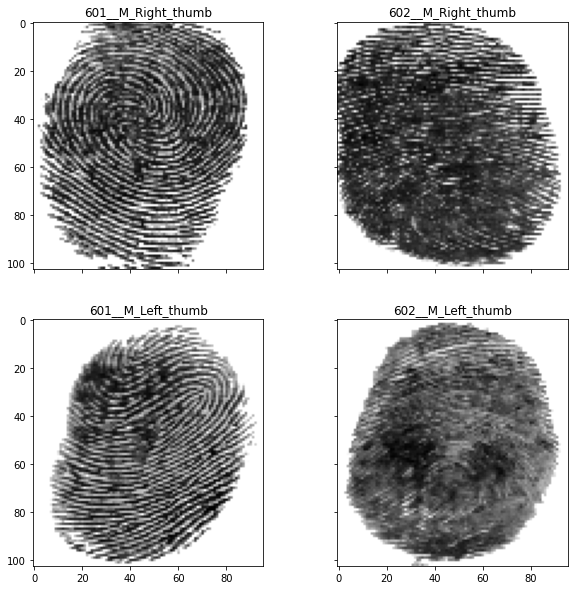

In [24]:
displaySample(data= private_data, nb_line=2, nb_columns=2)

# Merge all datasets (thumb grayscale images ) 

In [25]:
df = [real_data, easy_altered_data, medium_altered_data, hard_altered_data, private_data]

In [26]:
dataset = pd.concat(df, ignore_index=True)
dataset = dataset.sample(frac=1, random_state=42).reset_index(drop=True)

In [27]:
# save merge dataset 
dataset.to_pickle('/content/drive/MyDrive/Colab Notebooks/FingerPrint_Recognition/Data/merge_data.pkl')

In [28]:
dataset.shape

(11332, 5)

In [29]:
dataset.head(-100)

images gender  ... finger id_num
0      [[160, 160, 160, 160, 160, 160, 160, 160, 160,...      F  ...  thumb    142
1      [[160, 160, 160, 160, 160, 160, 160, 160, 160,...      M  ...  thumb    363
2      [[160, 160, 160, 160, 160, 160, 160, 160, 160,...      M  ...  thumb    545
3      [[160, 160, 160, 160, 160, 160, 160, 160, 160,...      F  ...  thumb     43
4      [[160, 160, 160, 160, 160, 160, 160, 160, 160,...      F  ...  thumb    130
...                                                  ...    ...  ...    ...    ...
11227  [[160, 160, 160, 160, 160, 160, 160, 160, 160,...      M  ...  thumb    432
11228  [[160, 160, 160, 160, 160, 160, 160, 160, 160,...      M  ...  thumb    290
11229  [[160, 160, 160, 160, 160, 160, 160, 160, 160,...      M  ...  thumb     26
11230  [[160, 160, 160, 160, 160, 160, 160, 160, 160,...      M  ...  thumb    291
11231  [[160, 160, 160, 160, 160, 160, 160, 160, 160,...      M  ...  thumb     93

[11232 rows x 5 columns]

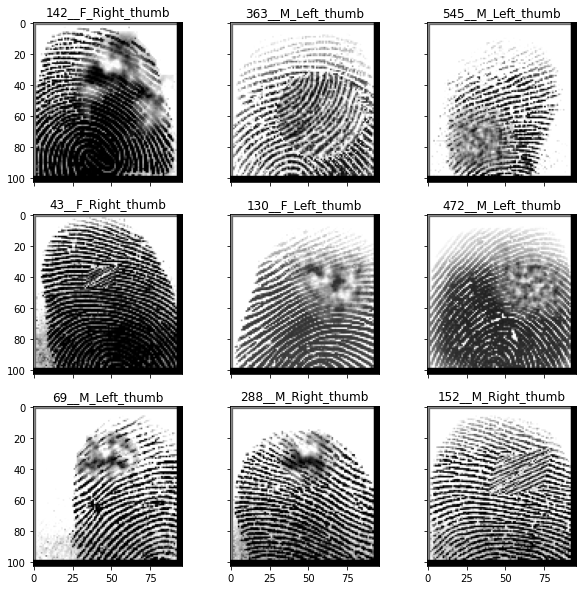

In [30]:
displaySample(data=dataset, nb_line=3, nb_columns=3)

# Preprocessing Data & features extraction for further tasks

In [31]:
dataset['images'][0].shape

(103, 96)

### Gabor algorithm for fingerprint image enhancement task

In [32]:
# Gabor Kernel parameters

ksize = 7  #Use size that makes sense to the image and fetaure size. Large may not be good. 
#On the synthetic image it is clear how ksize affects imgae (try 5 and 50)
sigma = 1 #Large sigma on small features will fully miss the features. 
theta = 1*np.pi/2  #/4 shows horizontal 3/4 shows other horizontal. Try other contributions
lambd = 1*np.pi/4  #1/4 works best for angled. 
gamma= 1  #Value of 1 defines spherical. Calue close to 0 has high aspect ratio
#Value of 1, spherical may not be ideal as it picks up features from other regions.
phi = 1 #Phase offset. I leave it to 0. 

def GaborFilter(img):

  #th, im_gray_th_otsu = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

  kernel = cv2.getGaborKernel((ksize,ksize), sigma, theta, lambd, gamma, phi, ktype=cv2.CV_32F)
  img_filtered = cv2.filter2D(img, cv2.CV_8UC3, kernel)

  kernel_resize = cv2.resize(kernel, (103, 96))
  fig, ax = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(10,10))

  ax[0].imshow(kernel_resize, cmap="gray")
  ax[0].set_title('Kernel')

  ax[1].imshow(img, cmap="gray")
  ax[1].set_title('Original image')

  ax[2].imshow(img_filtered, cmap="gray")
  ax[2].set_title('image filtered')

  plt.show()

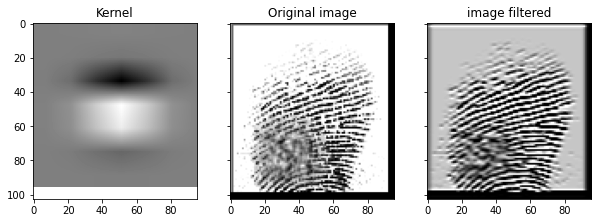

In [33]:
GaborFilter(dataset['images'].loc[2])

### Use finger_enhancer library to enhance all our images 


##### The method is based on a bank of Gabor filter. The orientation of the gabor filters is decided by the orientation of ridges in the input image.

###### @Utkarsh-Deshmukh
https://github.com/Utkarsh-Deshmukh/Fingerprint-Enhancement-Python

In [35]:
!pip install fingerprint_enhancer

In [36]:
#!pip install fingerprint_enhancer 
import fingerprint_enhancer 

In [37]:
img = easy_altered_data['images'][3]

In [38]:
def displayresult(img_origine = None, img_result = None, method = None):
  fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(6,6))

  ax[0].imshow(img_origine, cmap="gray")
  ax[0].set_title('Original image')
  
  ax[1].imshow(img_result, cmap="gray")
  ax[1].set_title(method)

  plt.show()


  def displayresultbis(img_origine = None, img_smoohted = None, img_segmented = None, feature = None, method = None):
    fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(6,6))

    ax[0].imshow(img_origine, cmap="gray")
    ax[0].set_title('Original image')

    ax[2].imshow(img_smoohted, cmap="gray")
    ax[2].set_title('fingerprint smoohted')

    ax[3].imshow(img_segmented, cmap="gray")
    ax[3].set_title('fingerprint segmented')
    
    ax[4].imshow(img_result, cmap="gray")
    ax[4].set_title(method)

    plt.show()

####__step__1 Smothing image

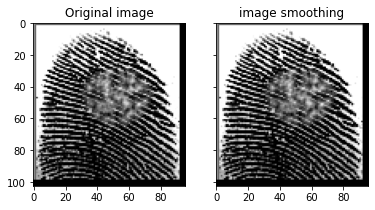

In [39]:
gauss_blur = cv2.GaussianBlur(img,(1,1),0)
displayresult(img_origine=img, img_result=gauss_blur, method='image smoothing')

#### __step__2 Fingerprint enhancement using finger_enhancement library

(350, 326)


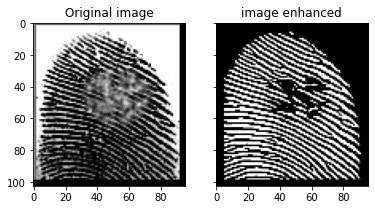

In [40]:
out = fingerprint_enhancer.FingerprintImageEnhancer()	
rs =out.enhance(gauss_blur)	# enhance the fingerprint image
print(rs.shape)
rs = cv2.resize(rs, (96, 103))
displayresult(img_origine=gauss_blur, img_result=rs, method='image enhanced')

#### __step__3 Edge detection

In [41]:
from skimage.feature import hessian_matrix, hessian_matrix_eigvals

def detect_ridges(gray, sigma= 0.1):
    H_elems = hessian_matrix(gray, sigma=sigma, order='rc')
    maxima_ridges, minima_ridges = hessian_matrix_eigvals(H_elems)
    return maxima_ridges, minima_ridges

In [42]:
def preprocessing_img(_img):
  
    img = cv2.resize(_img, (96, 103))
    img_smoothed = cv2.GaussianBlur(img,(1,1),0)
    img_seg = out.enhance(img)
    H_rigde_detected_max, _ = detect_ridges(rs)

    return img, img_smoothed, img_seg, H_rigde_detected_max

def img_segmentation(_img):
  
    img = cv2.resize(_img, (96, 103))
    img_smoothed = cv2.GaussianBlur(img,(1,1),0)
    img_seg = out.enhance(img)

    return img_seg

In [43]:
# preprocessing dataset to enhance image (smoohting & segmentation)
#dataset['img_segmented'] = dataset['images'].apply(img_segmentation)

In [44]:
def hessian_image(img):
  maxima_ridges, minima_ridges = detect_ridges(img)
  return maxima_ridges + minima_ridges

In [45]:
# rigdes detection
#dataset['Hessian_features'] = dataset['features'].apply(hessian_image)

In [46]:
# save merge dataset 
#dataset.to_pickle('/content/drive/MyDrive/Colab Notebooks/FingerPrint_Recognition/Data/merge_dataset_enhance.pkl')

In [47]:
dataset = pd.read_pickle('/content/drive/MyDrive/Colab Notebooks/FingerPrint_Recognition/Data/merge_dataset_enhance.pkl')
dataset.shape

(11332, 7)

In [48]:
dataset.head()

images  ...                                   Hessian_features
0  [[160, 160, 160, 160, 160, 160, 160, 160, 160,...  ...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
1  [[160, 160, 160, 160, 160, 160, 160, 160, 160,...  ...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
2  [[160, 160, 160, 160, 160, 160, 160, 160, 160,...  ...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
3  [[160, 160, 160, 160, 160, 160, 160, 160, 160,...  ...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
4  [[160, 160, 160, 160, 160, 160, 160, 160, 160,...  ...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...

[5 rows x 7 columns]

Apply Hessian matrix

In [49]:
max, min = detect_ridges(dataset['images'][1])

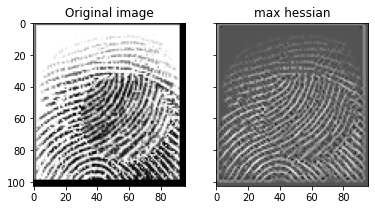

In [50]:
displayresult(img_origine=dataset['images'][1], img_result=max, method="max hessian")

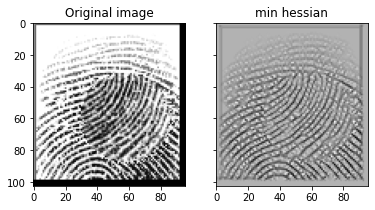

In [51]:
displayresult(img_origine=dataset['images'][1], img_result=min, method="min hessian")

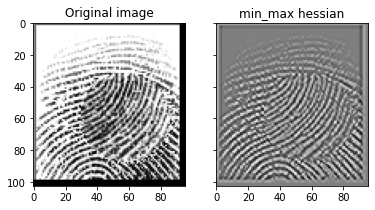

In [52]:
displayresult(img_origine=dataset['images'][1], img_result=min + max, method="min_max hessian")

Data features visualize

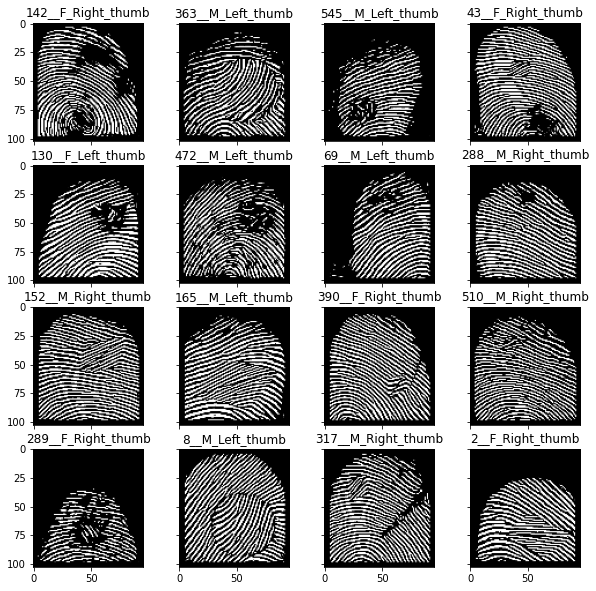

In [53]:
displaySampleFeatures(data=dataset, nb_line=4, nb_columns=4, name="features")

Rigde detection visualize

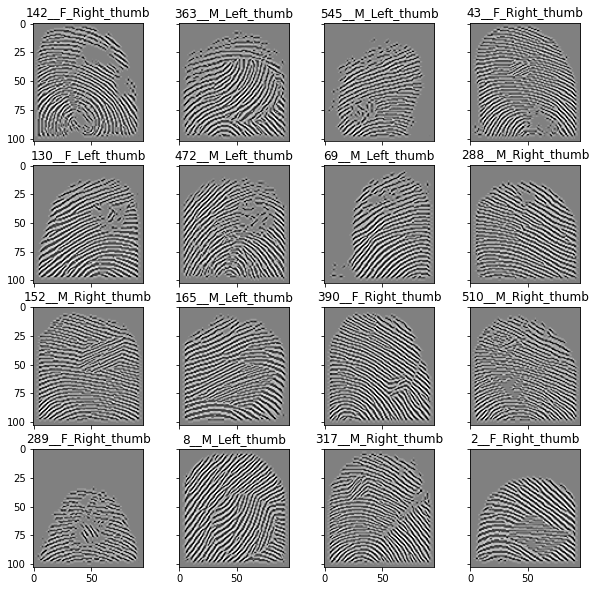

In [54]:
displaySampleFeatures(data=dataset, nb_line=4, nb_columns=4, name="Hessian_features")

We will use our first level features since hessian rigde detection features are not good for training ours models.

# Split our dataset into train, val and test set 

###### Overview our labels

In [55]:
np.sort(dataset['id_num'].unique())

array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70,
       71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87,
       88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181,
       182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194,
       195, 196, 197, 198, 199, 200, 201, 202, 

In [56]:
dataset['hand'].unique()

array(['Right', 'Left'], dtype=object)

In [57]:
len(dataset['id_num'].unique())

602

In [58]:
dataset['gender'].unique()

array(['F', 'M'], dtype=object)

##### Extract raws images and labels in our dataset dataframe

In [59]:
images_set = np.array(dataset['features'].values.tolist())
labels_id = np.array(dataset['id_num'].values.tolist()) # id person
labels_hand = np.array(dataset['hand'].values.tolist()) # hand side Left, Right
labels_gender = np.array(dataset['gender'].values.tolist()) # gender M, F

num_classes = len(dataset['id_num'].unique()) 
num_classes_hand = len(dataset['hand'].unique()) 
num_classes_gender = len(dataset['gender'].unique()) 

#### Transform hand side labels, to 1 (Right) or 0 (Left)

In [60]:
labels_hand

array(['Right', 'Left', 'Left', ..., 'Right', 'Left', 'Right'],
      dtype='<U5')

In [61]:
labels_gender

array(['F', 'M', 'M', ..., 'M', 'M', 'M'], dtype='<U1')

#### Transform Right, M to 1, and Left, F to 0

In [62]:
i = 0
for gender, hand_side in zip(labels_gender, labels_hand):
    labels_hand[i] = gender_handSide_Transpose(hand_side)
    labels_gender[i] = gender_handSide_Transpose(gender)

    i += 1

In [63]:
labels_hand = np.array(labels_hand, dtype='int')

In [64]:
labels_hand

array([1, 0, 0, ..., 1, 0, 1])

In [65]:
labels_gender = np.array(labels_gender, dtype='int')
labels_gender

array([0, 1, 1, ..., 1, 1, 1])

#### Splitting our dataset, 70% train set, 21% test set and 9% validation set for suject recognition & hand side recogniton

In [66]:
from sklearn.model_selection import  train_test_split

# split into train and test set for suject & hand side recognition
X_train,  X_test, Y_train_suject, Y_test_suject, Y_train_side, Y_test_side, Y_train_gender, Y_test_gender = train_test_split(images_set, labels_id, labels_hand, labels_gender, train_size=0.7, test_size=0.3, random_state=101)

# resplit test into final test and val set for suject recognition
X_test, X_val, Y_test_suject, Y_val_suject, Y_test_side, Y_val_side, Y_test_gender, Y_val_gender = train_test_split(X_test, Y_test_suject, Y_test_side, Y_test_gender, train_size=0.7, test_size=0.3, random_state=101)

In [67]:
print("Suject  recognition:\nTrain & labels shape: {}, {}\nTest & labels shape: {}, {}\nVal & labels shape: {}, {}".format(X_train.shape, Y_train_suject.shape, X_test.shape, Y_test_suject.shape, X_val.shape, Y_val_suject.shape))

Suject  recognition:
Train & labels shape: (7932, 103, 96), (7932,)
Test & labels shape: (2380, 103, 96), (2380,)
Val & labels shape: (1020, 103, 96), (1020,)


In [68]:
Y_train_gender.shape, Y_train_side.shape, Y_train_suject.shape

((7932,), (7932,), (7932,))

In [69]:
Y_test_gender.shape, Y_test_side.shape, Y_test_suject.shape

((2380,), (2380,), (2380,))

In [70]:
Y_val_gender.shape, Y_val_side.shape, Y_val_suject.shape

((1020,), (1020,), (1020,))

In [71]:
np.sort(Y_train_suject)

array([  1,   1,   1, ..., 600, 601, 602])

In [72]:
np.sort(Y_test_suject)

array([  1,   1,   1, ..., 600, 601, 602])

In [73]:
np.sort(Y_val_suject)

array([  1,   1,   1, ..., 599, 600, 600])

As we see validation didn't have subject 601 and 602, then we need to add it.

Equilibrate validation set

In [74]:
data = dataset.loc[dataset['id_num'] > 600 ]
data

images  ...                                   Hessian_features
913   [[255, 255, 255, 255, 255, 255, 255, 255, 255,...  ...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
4124  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...  ...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
6484  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...  ...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
9717  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...  ...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...

[4 rows x 7 columns]

In [75]:
X_val = np.vstack((X_val,np.array( data.features.values.tolist()[:2])))
Y_val_gender = np.concatenate((Y_val_gender, [0, 0]), axis = None)
Y_val_side = np.concatenate((Y_val_side, [0, 0]), axis = None)
Y_val_suject = np.concatenate(( Y_val_suject, [601, 602]), axis = None)

In [76]:
X_val.shape, Y_val_gender.shape, Y_val_side.shape, Y_val_suject.shape

((1022, 103, 96), (1022,), (1022,), (1022,))

In [77]:
np.unique(Y_val_suject)

array([  1,   2,   4,   5,   6,   7,   8,   9,  10,  12,  13,  14,  16,
        17,  18,  19,  21,  24,  25,  26,  28,  29,  30,  31,  32,  33,
        34,  36,  37,  38,  40,  41,  42,  43,  44,  46,  47,  48,  50,
        51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  89,  91,  92,
        93,  94,  95,  96,  98,  99, 100, 101, 102, 103, 104, 106, 107,
       108, 109, 110, 111, 112, 113, 114, 115, 117, 118, 119, 120, 121,
       122, 123, 124, 125, 126, 127, 128, 129, 130, 132, 135, 136, 137,
       138, 139, 141, 142, 145, 146, 147, 148, 150, 151, 152, 153, 154,
       155, 156, 157, 158, 159, 160, 161, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 180, 181, 182, 183,
       184, 186, 187, 188, 189, 190, 191, 192, 194, 196, 197, 199, 200,
       201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 21

In [78]:
Y_test_gender

array([1, 1, 1, ..., 1, 1, 1])

In [79]:
a = Y_test_gender
np.count_nonzero(Y_test_gender)

1915

# Let create our deep learning model

#### Initialize hyperparameters 

In [80]:
EPOCHS = 100
batch_size = 64
input_width = 96
input_height = 103
INT_LR = 1e-4

#### Prepare data for training model, reshape split sets and encode labels in onehot encoding

In [81]:
train = X_train.copy()
test = X_test.copy()


X_train = X_train.reshape(X_train.shape[0], input_height, input_width, 1)
X_train = X_train.astype('float32')
X_test = X_test.reshape(X_test.shape[0], input_height, input_width, 1)
X_test = X_test.astype('float32')
X_val = X_val.reshape(X_val.shape[0], input_height, input_width, 1)
X_val = X_val.astype('float32')


# copy label
test_labels_gender = Y_test_gender.copy()
test_labels_hand = Y_test_side.copy()
test_labels_id = Y_test_suject.copy()

train_labels_gender = Y_train_gender.copy()
train_labels_hand = Y_train_side.copy()
train_labels_id = Y_train_suject.copy()


# Onehot encoding

from keras.utils.np_utils import to_categorical
Y_train_suject = tf.one_hot(Y_train_suject, num_classes)
Y_test_suject = tf.one_hot(Y_test_suject, num_classes)
Y_val_suject = tf.one_hot(Y_val_suject, num_classes)

Y_train_side = tf.one_hot(Y_train_side, num_classes_hand)
Y_test_side = tf.one_hot(Y_test_side, num_classes_hand)
Y_val_side = tf.one_hot(Y_val_side, num_classes_hand)

Y_train_gender = tf.one_hot(Y_train_gender, num_classes_gender)
Y_test_gender = tf.one_hot(Y_test_gender, num_classes_gender)
Y_val_gender = tf.one_hot(Y_val_gender, num_classes_gender)

train_size = len(X_train)

In [82]:
!pip install -q pyyaml h5py

#### Create our deep learning model

In [86]:
import tensorflow as tf

filter = (3, 3)

In [87]:
X_train.shape

(7932, 103, 96, 1)

In [88]:
X_test.shape

(2380, 103, 96, 1)

In [89]:
X_val.shape

(1022, 103, 96, 1)

In [90]:
input_shape = tf.keras.layers.Input(shape=X_train.shape[1:])

In [91]:
def createModel(classes = None, name_output = None):

  model = tf.keras.Sequential()

  model.add(tf.keras.layers.InputLayer(input_shape=X_train.shape[1:]))

  model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=filter, activation='relu', padding='same', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
  model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=filter, activation='relu', padding='same', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))
  #model.add(tf.keras.layers.Dropout(0.25))

  model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=filter, activation='relu', padding='same',kernel_regularizer=tf.keras.regularizers.l2(0.001)))
  model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=filter, activation='relu', padding='same', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))
  #model.add(tf.keras.layers.Dropout(0.25))

  model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=filter, activation='relu', padding='same', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
  model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=filter, activation='relu', padding='same', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))
  #model.add(tf.keras.layers.Dropout(0.25))

  model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=filter, activation='relu', padding='same', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
  model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=filter, activation='relu', padding='same', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))
  #model.add(tf.keras.layers.Dropout(0.25))

  model.add(tf.keras.layers.Conv2D(filters=512, kernel_size=filter, activation='relu', padding='same', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
  model.add(tf.keras.layers.Conv2D(filters=512, kernel_size=filter, activation='relu', padding='same', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))
  #model.add(tf.keras.layers.Dropout(0.25))

  model.add(tf.keras.layers.Conv2D(filters=1024, kernel_size=filter, activation='relu', padding='same', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
  model.add(tf.keras.layers.Conv2D(filters=1024, kernel_size=filter, activation='relu', padding='same', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))
  model.add(tf.keras.layers.Dropout(0.25))

  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(units = 1024, activation='relu'))
  model.add(tf.keras.layers.Dropout(0.5))
  model.add(tf.keras.layers.Dense(units = 4096, activation='relu'))
  model.add(tf.keras.layers.Dense(classes, activation='softmax'))

  return model

In [92]:
# suject model
model_id = createModel(classes=num_classes)
# hand side model
model_hand = createModel(classes=num_classes_hand)
# gender model
model_gender = createModel(classes=num_classes_gender)

Prepare labels

Data Augmentation

In [ ]:
# DataGenerator for suject recognition
generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_generator_id = generator.flow(X_train, Y_train_suject, batch_size=batch_size)
val_generator_id = generator.flow(X_val, Y_val_suject, batch_size=batch_size)

train_generator_hand = generator.flow(X_train, Y_train_side, batch_size=batch_size)
val_generator_hand = generator.flow(X_val, Y_val_side, batch_size=batch_size)

train_generator_gender = generator.flow(X_train,Y_train_gender, batch_size=batch_size)
val_generator_gender = generator.flow(X_val,Y_val_gender, batch_size=batch_size)

In [ ]:
filepath = "/content/drive/My Drive/Colab Notebooks/FingerPrint_Recognition/Output/bestmodel.hdf5"

In [ ]:
earlyStopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', verbose=0, mode='min', patience = 10)
reduceLROnPlateau = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',factor=0.1, patience=1, min_lr=1e-9, verbose=1)

mcp_save = tf.keras.callbacks.ModelCheckpoint(filepath, save_best_only=True, monitor='val_loss', mode='min')

In [ ]:
X_train.shape[1:]

(103, 96, 1)

SUJECT MODEL

In [ ]:
rmsprop = tf.keras.optimizers.RMSprop(learning_rate=0.0001)


In [ ]:
model_id.compile(loss='categorical_crossentropy'
, optimizer=rmsprop
, metrics=['accuracy']
)

model_id.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 103, 96, 32)       320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 103, 96, 32)       9248      
_________________________________________________________________
batch_normalization (BatchNo (None, 103, 96, 32)       128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 51, 48, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 51, 48, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 51, 48, 64)        36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 51, 48, 64)        2

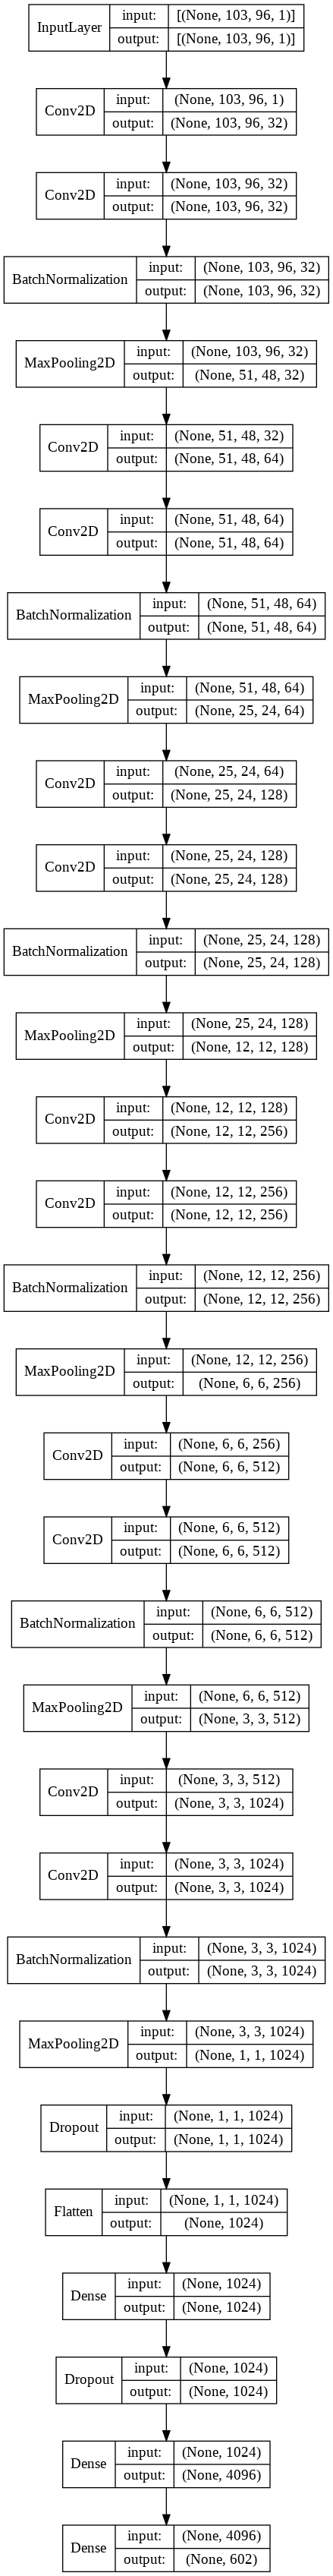

In [ ]:
tf.keras.utils.plot_model(model_id, to_file='/content/drive/MyDrive/Colab Notebooks/FingerPrint_Recognition/Output/Arch_id.png', show_shapes=True, show_layer_names=False, rankdir='TB', expand_nested=False, dpi=96)

In [ ]:
histories = model_id.fit(train_generator_id,validation_data=val_generator_id, steps_per_epoch=train_size//batch_size, epochs=EPOCHS,
                         validation_steps = (len(X_val))//batch_size, verbose=1,
                         callbacks=[mcp_save, reduceLROnPlateau, earlyStopping])

Epoch 1/100
123/123 [==============================] - 67s 255ms/step - loss: 9.9363 - accuracy: 0.0018 - val_loss: 9.4994 - val_accuracy: 0.0042
Epoch 2/100
123/123 [==============================] - 27s 223ms/step - loss: 9.1714 - accuracy: 0.0078 - val_loss: 9.4039 - val_accuracy: 0.0010
Epoch 3/100
123/123 [==============================] - 27s 222ms/step - loss: 7.8996 - accuracy: 0.0421 - val_loss: 9.6017 - val_accuracy: 0.0000e+00

Epoch 00003: ReduceLROnPlateau reducing learning rate to 9.999999747378752e-06.
Epoch 4/100
123/123 [==============================] - 27s 222ms/step - loss: 6.3155 - accuracy: 0.1878 - val_loss: 9.0941 - val_accuracy: 0.0031
Epoch 5/100
123/123 [==============================] - 27s 222ms/step - loss: 5.7200 - accuracy: 0.2898 - val_loss: 7.8568 - val_accuracy: 0.0417
Epoch 6/100
123/123 [==============================] - 27s 222ms/step - loss: 5.3074 - accuracy: 0.3795 - val_loss: 5.9757 - val_accuracy: 0.3792
Epoch 7/100
123/123 [==================

In [ ]:
#model_id = tf.keras.models.load_model("/content/drive/My Drive/Colab Notebooks/FingerPrint_Recognition/Output/model_id.h5")

In [86]:
train_set = X_train / 255
test_set = X_test / 255

In [ ]:
train_score = model_id.evaluate(train_set, Y_train_suject, verbose=0)
print('Train loss:', train_score[0])
print('Train accuracy:', 100*train_score[1])

test_score = model_id.evaluate(test_set, Y_test_suject, verbose=0)
print('Test loss:', test_score[0])
print('Test accuracy:', 100*test_score[1])

Train loss: 2.37027645111084
Train accuracy: 99.98739361763
Test loss: 2.446665048599243
Test accuracy: 99.03361201286316


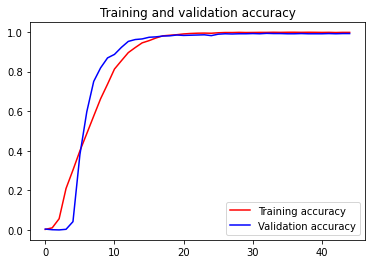

<Figure size 432x288 with 0 Axes>

In [ ]:
acc = histories.history['accuracy']
val_acc = histories.history['val_accuracy']
loss = histories.history['loss']
val_loss = histories.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

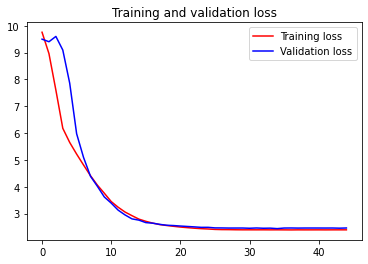

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()

plt.show()

MODEL HAND

In [ ]:
model_hand.compile(loss='categorical_crossentropy'
, optimizer='adam'
, metrics=['accuracy']
)

model_hand.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 103, 96, 32)       320       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 103, 96, 32)       9248      
_________________________________________________________________
batch_normalization_6 (Batch (None, 103, 96, 32)       128       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 51, 48, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 51, 48, 64)        18496     
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 51, 48, 64)        36928     
_________________________________________________________________
batch_normalization_7 (Batch (None, 51, 48, 64)       

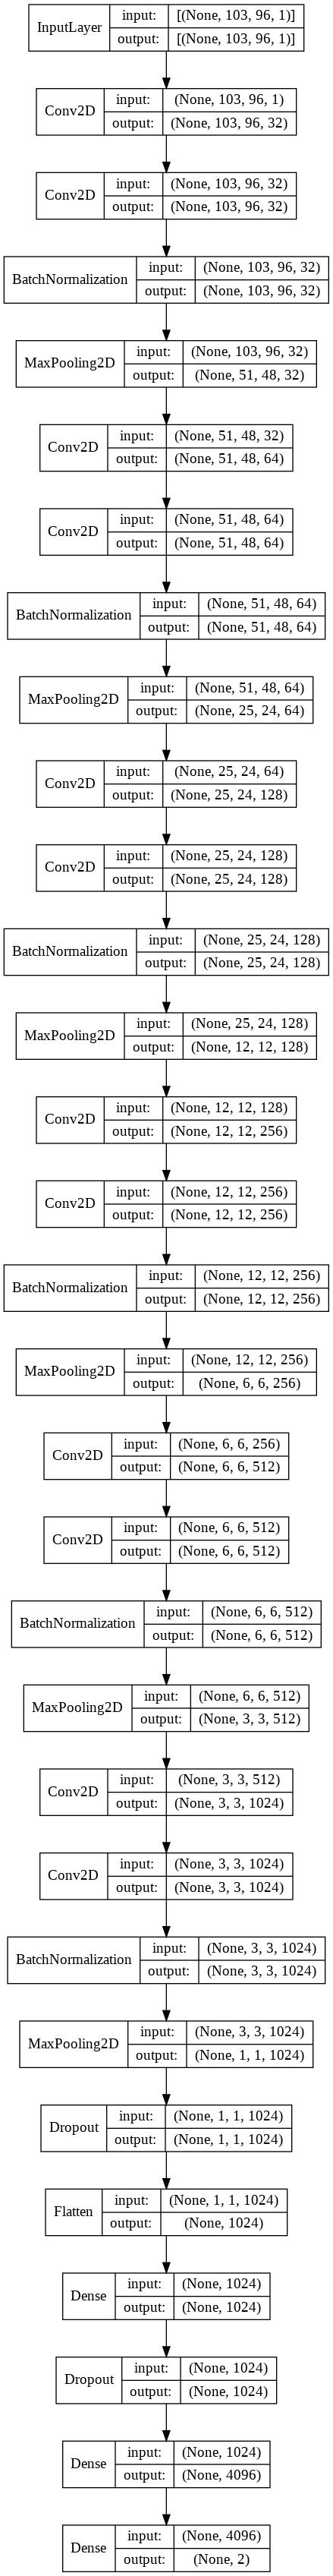

In [ ]:
tf.keras.utils.plot_model(model_hand, to_file='/content/drive/MyDrive/Colab Notebooks/FingerPrint_Recognition/Output/Arch_hand.png', show_shapes=True, show_layer_names=False, rankdir='TB', expand_nested=False, dpi=96)

In [ ]:
histories = model_hand.fit(train_generator_hand,validation_data=val_generator_hand, steps_per_epoch=train_size//batch_size, epochs=EPOCHS,
                         validation_steps = (len(X_val))//batch_size, verbose=1, callbacks=[mcp_save, reduceLROnPlateau, earlyStopping])

Epoch 1/100
123/123 [==============================] - 28s 208ms/step - loss: 4.4019 - accuracy: 0.9014 - val_loss: 3.7467 - val_accuracy: 0.5104
Epoch 2/100
123/123 [==============================] - 25s 205ms/step - loss: 2.2937 - accuracy: 0.9838 - val_loss: 7.8722 - val_accuracy: 0.4969

Epoch 00002: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Epoch 3/100
123/123 [==============================] - 25s 204ms/step - loss: 1.6049 - accuracy: 0.9955 - val_loss: 7.1989 - val_accuracy: 0.4917

Epoch 00003: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Epoch 4/100
123/123 [==============================] - 25s 205ms/step - loss: 1.5370 - accuracy: 0.9964 - val_loss: 2.5258 - val_accuracy: 0.6469
Epoch 5/100
123/123 [==============================] - 25s 205ms/step - loss: 1.5261 - accuracy: 0.9980 - val_loss: 1.6083 - val_accuracy: 0.9625
Epoch 6/100
123/123 [==============================] - 25s 205ms/step - loss: 1.5142 - accuracy: 0.9989 - 

In [ ]:
train_score = model_hand.evaluate(train_set, Y_train_side, verbose=0)
print('Train loss:', train_score[0])
print('Train accuracy:', 100*train_score[1]) 

test_score = model_hand.evaluate(test_set, Y_test_side, verbose=0)
print('Test loss:', test_score[0])
print('Test accuracy:', 100*test_score[1])

Train loss: 0.2413502186536789
Train accuracy: 100.0
Test loss: 0.2512446641921997
Test accuracy: 99.91596341133118


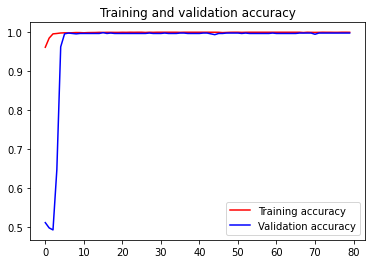

<Figure size 432x288 with 0 Axes>

In [ ]:
acc = histories.history['accuracy']
val_acc = histories.history['val_accuracy']
loss = histories.history['loss']
val_loss = histories.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

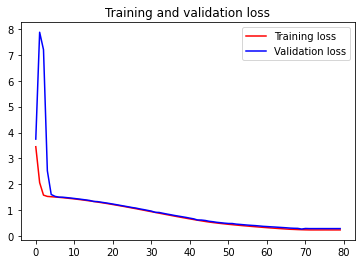

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()

plt.show()

MODEL GENDER

In [ ]:
model_gender.compile(loss='categorical_crossentropy'
, optimizer='adam'
, metrics=['accuracy']
)

model_gender.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 103, 96, 32)       320       
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 103, 96, 32)       9248      
_________________________________________________________________
batch_normalization_12 (Batc (None, 103, 96, 32)       128       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 51, 48, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 51, 48, 64)        18496     
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 51, 48, 64)        36928     
_________________________________________________________________
batch_normalization_13 (Batc (None, 51, 48, 64)       

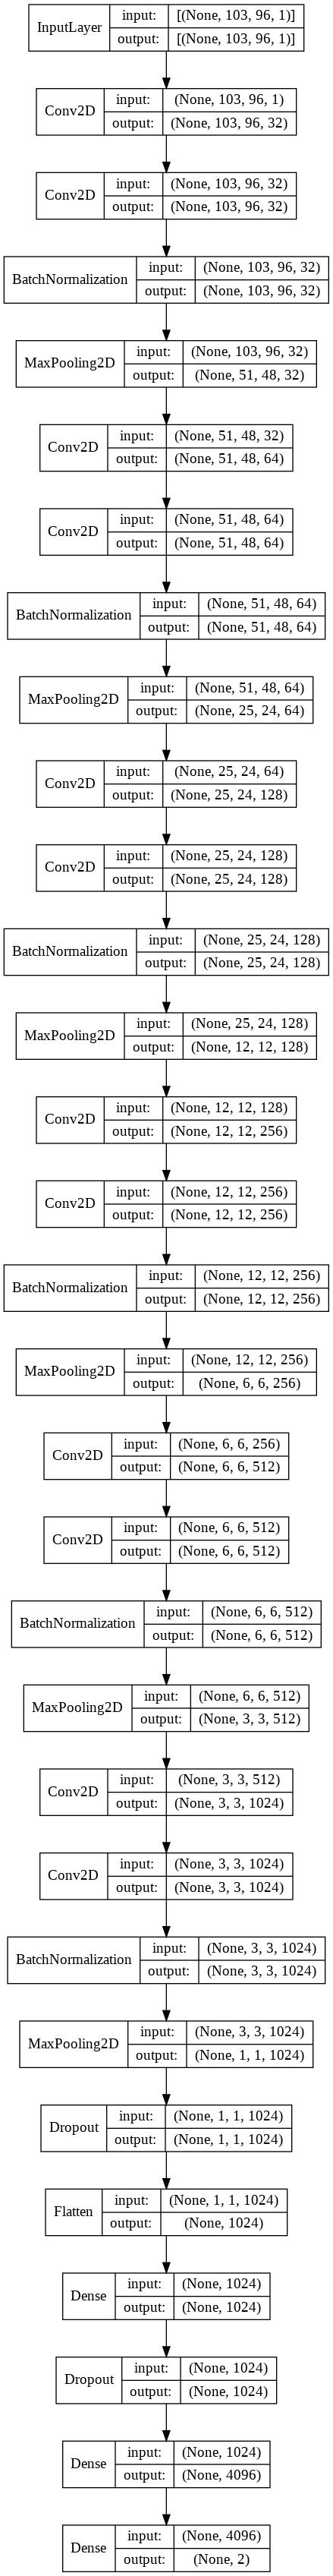

In [ ]:
tf.keras.utils.plot_model(model_gender, to_file='/content/drive/MyDrive/Colab Notebooks/FingerPrint_Recognition/Output/Arch_gender.png', show_shapes=True, show_layer_names=False, rankdir='TB', expand_nested=False, dpi=96)

In [ ]:
histories = model_gender.fit(train_generator_gender,validation_data=val_generator_gender, steps_per_epoch=train_size//batch_size, epochs=EPOCHS,
                         validation_steps = (len(X_val))//batch_size, verbose=1,
                         callbacks=[mcp_save, reduceLROnPlateau, earlyStopping])

Epoch 1/100
123/123 [==============================] - 28s 208ms/step - loss: 4.6021 - accuracy: 0.7584 - val_loss: 3.1132 - val_accuracy: 0.8042
Epoch 2/100
123/123 [==============================] - 25s 205ms/step - loss: 2.5808 - accuracy: 0.8114 - val_loss: 2.0172 - val_accuracy: 0.8021
Epoch 3/100
123/123 [==============================] - 25s 204ms/step - loss: 1.7204 - accuracy: 0.8126 - val_loss: 1.6409 - val_accuracy: 0.1958
Epoch 4/100
123/123 [==============================] - 25s 204ms/step - loss: 1.2892 - accuracy: 0.8140 - val_loss: 1.2872 - val_accuracy: 0.8083
Epoch 5/100
123/123 [==============================] - 25s 204ms/step - loss: 1.0345 - accuracy: 0.8074 - val_loss: 0.9055 - val_accuracy: 0.8313
Epoch 6/100
123/123 [==============================] - 25s 205ms/step - loss: 0.8481 - accuracy: 0.8175 - val_loss: 0.9234 - val_accuracy: 0.8010

Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Epoch 7/100
123/123 [=====================

In [ ]:
train_score = model_gender.evaluate(train_set, Y_train_gender, verbose=0)
print('Train loss:', train_score[0])
print('Train accuracy:', 100*train_score[1])

test_score = model_gender.evaluate(test_set, Y_test_gender, verbose=0) 
print('Test loss:', test_score[0])
print('Test accuracy:', 100*test_score[1])

Train loss: 0.3139796853065491
Train accuracy: 99.88653659820557
Test loss: 0.35701730847358704
Test accuracy: 98.52941036224365


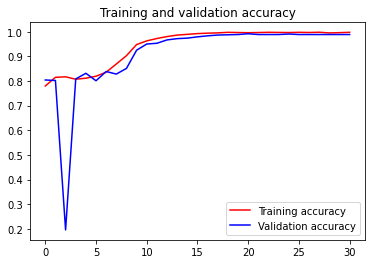

<Figure size 432x288 with 0 Axes>

In [ ]:
acc = histories.history['accuracy']
val_acc = histories.history['val_accuracy']
loss = histories.history['loss']
val_loss = histories.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

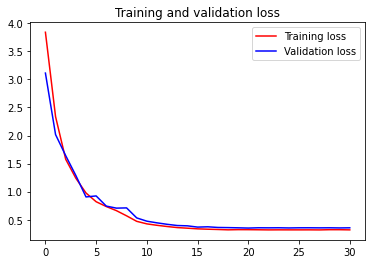

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()

plt.show()

SAVE MODELS suject_id, hand side and gender

In [ ]:
model_id.save("/content/drive/My Drive/Colab Notebooks/FingerPrint_Recognition/Output/model_id2.h5", save_format="h5")

model_hand.save("/content/drive/My Drive/Colab Notebooks/FingerPrint_Recognition/Output/model_hand2.h5", save_format="h5")

model_gender.save("/content/drive/My Drive/Colab Notebooks/FingerPrint_Recognition/Output/model_gender2.h5", save_format="h5")

Load saved model

In [83]:
model_id = tf.keras.models.load_model("/content/drive/My Drive/Colab Notebooks/FingerPrint_Recognition/Output/model_id2.h5")

model_hand = tf.keras.models.load_model("/content/drive/My Drive/Colab Notebooks/FingerPrint_Recognition/Output/model_hand2.h5")

model_gender = tf.keras.models.load_model("/content/drive/My Drive/Colab Notebooks/FingerPrint_Recognition/Output/model_gender2.h5")

# Build corresponding predict label function

In [87]:
y_pred_suject = model_id.predict(test_set)

y_pred_hand = model_hand.predict(test_set)

y_pred_gender = model_gender.predict(test_set)

In [88]:
y_pred_suject[0]

array([9.16584216e-21, 3.62957997e-10, 5.42087068e-15, 5.60860425e-09,
       3.57688528e-08, 1.08945086e-13, 1.14345585e-14, 8.50114684e-13,
       5.12011901e-14, 5.12206241e-18, 4.46463992e-13, 1.94745316e-13,
       8.36367642e-11, 5.99908198e-13, 2.68597753e-12, 4.38703240e-12,
       3.46948997e-11, 1.67992976e-14, 1.58329228e-13, 1.01498514e-11,
       2.62208197e-15, 3.36723433e-13, 3.00979484e-11, 5.65902915e-14,
       1.45971498e-07, 6.96694872e-12, 1.73694065e-17, 6.76293223e-13,
       2.69088520e-08, 1.10647678e-12, 4.37276344e-12, 2.46360464e-14,
       2.22117640e-15, 8.21748760e-15, 4.14205345e-13, 1.02269715e-09,
       7.11966763e-10, 4.22847347e-12, 1.00162309e-11, 1.36172591e-14,
       5.63863904e-16, 1.33899170e-10, 6.36630912e-14, 9.45005684e-13,
       3.05827276e-14, 5.99071834e-11, 2.67741029e-08, 2.84462055e-11,
       2.07429390e-14, 1.57753563e-12, 3.41096881e-14, 7.09568512e-14,
       2.58411912e-16, 3.58118402e-09, 7.11513071e-11, 3.89645896e-14,
      

In [89]:
y_pred_hand[0]

array([2.8623555e-12, 1.0000000e+00], dtype=float32)

In [90]:
y_pred_gender[0]

array([0.00122025, 0.9987797 ], dtype=float32)

In [91]:
y_pred_labels_suject = np.argmax(y_pred_suject, axis=1) + 1
print(y_pred_labels_suject)

print("---------")
y_pred_labels_hand = np.argmax(y_pred_hand, axis=1) 
y_pred_labels_hand

print("---------")
y_pred_labels_gender = np.argmax(y_pred_gender, axis=1) 
y_pred_labels_gender

[382  90 163 ... 166 562 374]
---------
---------


array([1, 1, 1, ..., 1, 1, 1])

In [92]:
print(np.sum(y_pred_suject[100]),'--', np.sum(y_pred_hand[100]), '--', np.sum(y_pred_gender[100]))

1.0 -- 1.0 -- 1.0


In [93]:
y_true_labels_suject = np.argmax(Y_test_suject, axis=1) + 1
print(y_true_labels_suject)

print("---------")
_y_true_labels_hand = np.argmax(Y_test_side, axis=1)
print(_y_true_labels_hand)
lab = list()
for pos ,i in enumerate(_y_true_labels_hand):
  if i == 1: 
    lab.insert(pos,'Right') 
  else: 
    lab.insert(pos,'Left') 
print("---------")
y_true_labels_hand = lab
print(y_true_labels_hand)


print("---------")
_y_true_labels_gender = np.argmax(Y_test_gender, axis=1)
print(_y_true_labels_gender)
lab = list()
for pos ,i in enumerate(_y_true_labels_gender):
  if i == 1: 
    lab.insert(pos,'M') 
  else: 
    lab.insert(pos,'M') 
print("---------")
y_true_labels_gender = lab
print(_y_true_labels_gender)

[382  90 163 ... 166 562 374]
---------
[1 0 1 ... 0 0 1]
---------
['Right', 'Left', 'Right', 'Left', 'Right', 'Right', 'Right', 'Left', 'Left', 'Right', 'Left', 'Left', 'Left', 'Right', 'Left', 'Left', 'Right', 'Right', 'Right', 'Left', 'Left', 'Left', 'Left', 'Left', 'Left', 'Right', 'Left', 'Left', 'Left', 'Left', 'Left', 'Right', 'Right', 'Left', 'Left', 'Right', 'Left', 'Left', 'Right', 'Right', 'Left', 'Right', 'Left', 'Right', 'Right', 'Left', 'Left', 'Left', 'Left', 'Right', 'Left', 'Right', 'Right', 'Right', 'Right', 'Right', 'Left', 'Left', 'Left', 'Left', 'Left', 'Left', 'Left', 'Right', 'Right', 'Left', 'Left', 'Left', 'Right', 'Right', 'Right', 'Left', 'Left', 'Left', 'Left', 'Left', 'Right', 'Right', 'Left', 'Right', 'Right', 'Right', 'Right', 'Left', 'Right', 'Left', 'Left', 'Left', 'Right', 'Left', 'Right', 'Right', 'Right', 'Left', 'Right', 'Left', 'Left', 'Right', 'Left', 'Left', 'Right', 'Right', 'Right', 'Right', 'Left', 'Left', 'Left', 'Left', 'Left', 'Right', 'Ri

# Evaluate Model : Confusion matrix & Classification report 



#### Draw confusion matrix


In [94]:
############## Draw confusion matrix

#@reuse from  Dennis Trimarchi github

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    

    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

In [95]:
from sklearn.metrics import confusion_matrix

cf_matrix_suject = confusion_matrix(y_true_labels_suject, y_pred_labels_suject )
print(cf_matrix_suject,'\n--------------------')

cf_matrix_hand = confusion_matrix(_y_true_labels_hand, y_pred_labels_hand )
print(cf_matrix_hand,'\n--------------------')

cf_matrix_gender = confusion_matrix(_y_true_labels_gender, y_pred_labels_gender)
print(cf_matrix_gender)

[[0 0 0 ... 0 0 0]
 [0 5 0 ... 0 0 0]
 [0 0 4 ... 0 0 0]
 ...
 [0 0 0 ... 3 0 0]
 [0 0 0 ... 0 4 0]
 [0 0 0 ... 0 0 0]] 
--------------------
[[1218    1]
 [   1 1160]] 
--------------------
[[ 443   22]
 [  13 1902]]


In [96]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    #http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html


    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.2f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.2f}\n misclass={:0.2f}'.format(accuracy, misclass))
    plt.show()

In [97]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
class_labels_suject = [str(i) for i in range(1, len(cf_matrix_suject) + 1)]
print(classification_report(y_true_labels_suject, y_pred_labels_suject, target_names= class_labels_suject))


Classification Report

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         7
           5       1.00      1.00      1.00         4
           6       1.00      1.00      1.00         4
           7       1.00      1.00      1.00         3
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         6
          10       1.00      1.00      1.00         5
          11       1.00      1.00      1.00         2
          12       1.00      1.00      1.00         5
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         3
          15       1.00      1.00      1.00         5
          16       1.00      1.00      1.00         7
          17       1.00      1.00      1.00         2
   

In [98]:
print('\nClassification Report Hand side\n')
class_labels_hand = [str(i) for i in range(0, len(cf_matrix_hand))]
print(classification_report(_y_true_labels_hand, y_pred_labels_hand, target_names= class_labels_hand))


Classification Report Hand side

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1219
           1       1.00      1.00      1.00      1161

    accuracy                           1.00      2380
   macro avg       1.00      1.00      1.00      2380
weighted avg       1.00      1.00      1.00      2380



In [99]:
print('\nClassification Report Gender\n')
class_labels_gender = [str(i) for i in range(0, len(cf_matrix_gender))]
print(classification_report(_y_true_labels_gender, y_pred_labels_gender, target_names= class_labels_gender))


Classification Report Gender

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       465
           1       0.99      0.99      0.99      1915

    accuracy                           0.99      2380
   macro avg       0.98      0.97      0.98      2380
weighted avg       0.99      0.99      0.99      2380



#### Hand side confusion matrix

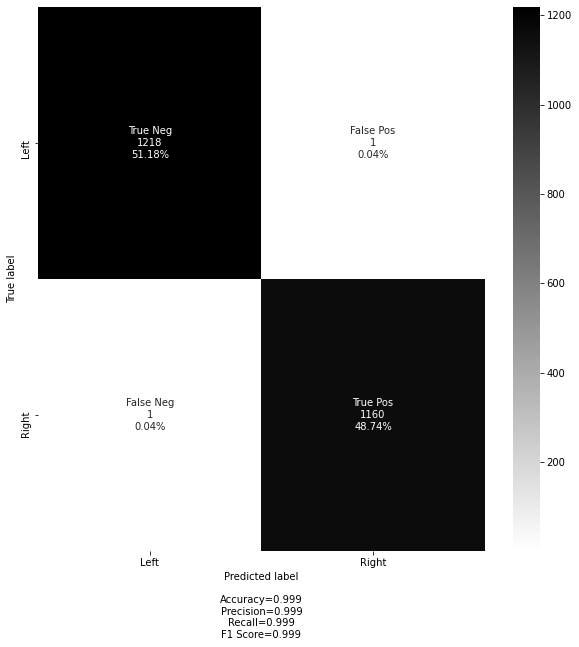

In [100]:
_labels = ['True Neg','False Pos','False Neg','True Pos']
make_confusion_matrix(cf_matrix_hand, group_names=_labels,categories=["Left", "Right"], figsize=(10,10), cmap='binary')

Gender confusion matrix

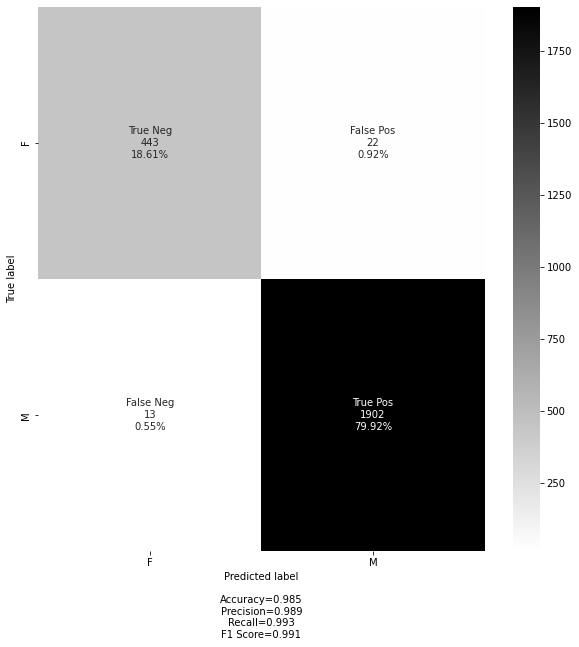

In [101]:
_labels = ['True Neg','False Pos','False Neg','True Pos']
make_confusion_matrix(cf_matrix_gender, group_names=_labels,categories=["F", "M"], figsize=(10,10), cmap='binary')

Suject confusion matrix

In [ ]:
df_cm = pd.DataFrame(cf_matrix_suject, index = class_labels_suject, columns = class_labels_suject)

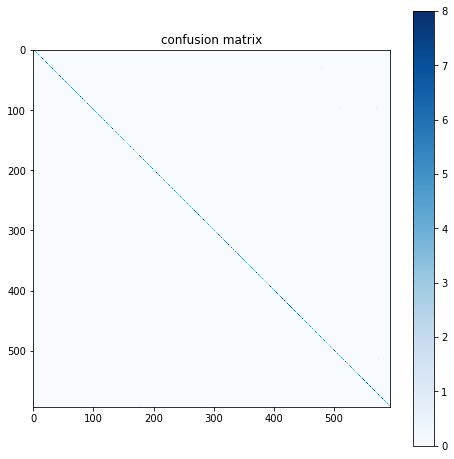

In [ ]:
plt.figure(figsize=(8, 8))
plt.imshow(df_cm, interpolation='nearest', cmap='Blues')
plt.title('confusion matrix')
plt.colorbar()
plt.show()

# Qualitative evaluation: make prediction for a given image 

In [102]:
def make_prediction(pathfile):
  test_img = pathfile
  #test_img = cv2.imread(filepath,0)
  #img = test_img.copy()
  #_,_,_,test_img = preprocessing_img(test_img)
  test_img = test_img.reshape(1, test_img.shape[0], test_img.shape[1], 1)
  test_img = test_img/255
  pred_id = model_id.predict(test_img)
  pred_hand = model_hand.predict(test_img)
  pred_gender = model_gender.predict(test_img)

  label_id, label_hand, label_gender = np.argmax(pred_id, axis=1) + 1, np.argmax(pred_gender, axis=1) , np.argmax(pred_gender, axis=1) 
  print( label_id, label_hand, label_gender)
  displayresult(img_origine=pathfile, img_result=dataset["images"][dataset['id_num']==labels_id[0]].values[-1] , method='predict class: [{}-{}-{}]'.format(label_id[0], label_hand[0], label_gender[0]))

In [ ]:
dataset.head()

images  ...                                   Hessian_features
0  [[160, 160, 160, 160, 160, 160, 160, 160, 160,...  ...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
1  [[160, 160, 160, 160, 160, 160, 160, 160, 160,...  ...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
2  [[160, 160, 160, 160, 160, 160, 160, 160, 160,...  ...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
3  [[160, 160, 160, 160, 160, 160, 160, 160, 160,...  ...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
4  [[160, 160, 160, 160, 160, 160, 160, 160, 160,...  ...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...

[5 rows x 7 columns]

In [ ]:
data.head()

images  ...                                   Hessian_features
913   [[255, 255, 255, 255, 255, 255, 255, 255, 255,...  ...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
4124  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...  ...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
6484  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...  ...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
9717  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...  ...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...

[4 rows x 7 columns]

In [ ]:
make_prediction(dataset['features'].loc[0])

# COMPARE WITH ORDER MODELS

In [93]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC,LinearSVC, NuSVC
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

In [94]:
class OTHERS_MODELS:
    def __init__(self, x_train, y_train_id, y_train_hand, y_train_gender, x_test, y_test_id, y_test_hand, y_test_gender):
        self.X_train, self.Y_train_id, self.Y_train_hand, self.Y_train_gender = x_train, y_train_id, y_train_hand, y_train_gender
        self.X_test, self.Y_test_id, self.Y_test_hand, self.Y_test_gender = x_test, y_test_id, y_test_hand, y_test_gender
  
    
    # training
    def model_fit(self, model):
        self.clf_id = model.fit(self.X_train, self.Y_train_id)
        self.clf_hand = model.fit(self.X_train, self.Y_train_hand)
        self.clf_gender = model.fit(self.X_train, self.Y_train_gender)


    # classification report
    def model_predict(self):
        self.Y_pred_id = self.clf_id.predict(self.X_test)
        self.Y_pred_hand = self.clf_hand.predict(self.X_test)
        self.Y_pred_gender = self.clf_gender.predict(self.X_test)


    def model_evaluate(self):
      self.confusion_matrix()
      print("Accuracy suject: {}\nAccuracy hand: {}\nAccuracy gender: {}\n\n".format(
          np.trace(self.cf_id) / float(np.sum(self.cf_id)), np.trace(self.cf_hand) / float(np.sum(self.cf_hand)),
          np.trace(self.cf_gender) / float(np.sum(self.cf_gender))))
      

    def confusion_matrix(self):
       self.cf_id = confusion_matrix(self.Y_test_id, self.Y_pred_id)
       self.cf_hand = confusion_matrix(self.Y_test_hand, self.Y_pred_hand)
       self.cf_gender = confusion_matrix(self.Y_test_gender, self.Y_pred_gender)


          
    # classification
    def classify(self, *_classifiers):
        self.classifiers = _classifiers
        for _classifier in self.classifiers:
            self.model_fit(_classifier)
            print("________________________________________________________________________________________________________________")
            print("################################################################################################################\n"
                  ,str(_classifier))
            print("########################### EVALUATION ##############################")
            self.model_predict()
            self.model_evaluate()

In [95]:
test.shape

(2380, 103, 96)

In [96]:
train_labels_id.shape, train.shape

((7932,), (7932, 103, 96))

In [97]:
_train = train.reshape((train.shape[0],train.shape[1] * train.shape[2]))
_test = test.reshape((test.shape[0],test.shape[1] * test.shape[2])) 

In [98]:
_train.shape, _test.shape

((7932, 9888), (2380, 9888))

In [ ]:
model_classifier = OTHERS_MODELS(_train/255, train_labels_id, train_labels_hand, train_labels_gender, 
                                 _test/255, test_labels_id, test_labels_hand, test_labels_gender) 

In [ ]:
model_classifier.classify(MultinomialNB(fit_prior=False),
                          BernoulliNB(),
                          LinearSVC(),
                          SVC(),
                          LogisticRegression(),
                          SGDClassifier(),
                          RandomForestClassifier(),
                          DecisionTreeClassifier())

________________________________________________________________________________________________________________
################################################################################################################
 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=False)
########################### EVALUATION ##############################
Accuracy suject: 0.0021008403361344537
Accuracy hand: 0.5743697478991596
Accuracy gender: 0.7298319327731092


________________________________________________________________________________________________________________
################################################################################################################
 BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)
########################### EVALUATION ##############################
Accuracy suject: 0.0021008403361344537
Accuracy hand: 0.557563025210084
Accuracy gender: 0.6659663865546218


______________________________________________________

# APPROCHE PAR MATCHING

In [99]:
data.head() 

images  ...                                   Hessian_features
913   [[255, 255, 255, 255, 255, 255, 255, 255, 255,...  ...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
4124  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...  ...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
6484  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...  ...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
9717  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...  ...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...

[4 rows x 7 columns]

In [117]:
tr = data['features'].values[:2]
len(tr), tr

(2, array([array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
        array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)], dtype=object))

In [118]:
ts = data['features'].values[2:]
len(tr), tr

(2, array([array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
        array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)], dtype=object))

In [119]:
from scipy.spatial import distance


eucli_threshold = 0.005
cosinus_threshold = 0.00003

def distEuclidian(feature_ref = None, feature_target = None):
    
    return distance.euclidean(feature_ref, feature_target)


def findCosineSimilarity(source, cible):

     return distance.cosine(source, cible)


def calHisto(img):
  histo = cv2.calcHist([img],[0],None,[128],[0,127]) 
  #print(histo.shape)
  #plt.plot(histo) 
  #plt.show() 

  return cv2.normalize(histo,histo)

def computeSimilarity(ft_s, ft_c, method, threshold):
  ref = calHisto(ft_s)
  target = calHisto(ft_c)
  
  if method == 'findCosineSimilarity':
    dist = findCosineSimilarity(ref, target)
  else:
    dist = distEuclidian(ref, target)
    
  if dist < threshold:
    return dist, True
  else:
    return dist, False


def match_train_set(_train, _test, train_lab, test_lab, method, threshold):
  accuracy = 0
  error = 0

  for i, target in enumerate(_test) :
    is_similar = 0
    is_error = 0
    for j, ref in enumerate(_train):
      dist, similar = computeSimilarity(target, ref, method, threshold)
      if similar:
        print(dist)
        print("Match: ",test_lab[i], train_lab[j])
        is_similar += 1
      else:
        #print("err: ",test_lab[i], train_lab[j]) 
        is_error += 1

    # partiel result
    if is_similar != 0:
      accuracy += 1
    elif is_error != 0:
      error += 1
    
  print("\nTotal number features for Test: {}\nNumber matched: {}\nNumber failed: {}".format(len(test_lab), accuracy, error))
  print("\nAccuracy: {}\n\nError: {}"
  .format(accuracy/len(test_lab), error/len(test_lab)))

In [120]:
# cosinus distance metric
match_train_set(tr, ts, [601, 602], [601, 602], 'findCosineSimilarity', cosinus_threshold) 

2.6345252990722656e-05
Match:  601 601
1.811981201171875e-05
Match:  602 601
1.1861324310302734e-05
Match:  602 602

Total number features for Test: 2
Number matched: 2
Number failed: 0

Accuracy: 1.0

Error: 0.0


In [121]:
match_train_set(tr, ts, [601, 602], [601, 602], 'distEuclidian', eucli_threshold)

0.004877466708421707
Match:  602 602

Total number features for Test: 2
Number matched: 1
Number failed: 1

Accuracy: 0.5

Error: 0.5


We can observed down directly use similarity based on distance euclidian or cosinus distance, without indexing database, produce very bad results (Faux positive)

In [122]:
n = 3

In [123]:
match_train_set(train, test[:n], train_labels_id, test_labels_id[:n], 'distEuclidian', eucli_threshold) 

0.0037565373349934816
Match:  381 381
0.0019322019070386887
Match:  381 381
0.004252944607287645
Match:  89 89
0.00492832763120532
Match:  89 521
0.004817583132535219
Match:  89 89
0.0019198263762518764
Match:  89 89
0.004629261326044798
Match:  89 89
0.00474907923489809
Match:  162 308
0.004689700435847044
Match:  162 230
0.004245607648044825
Match:  162 553
0.004674496594816446
Match:  162 174
0.004455829504877329
Match:  162 95
0.004697397351264954
Match:  162 418
0.004230797756463289
Match:  162 386
0.004193814937025309
Match:  162 554
0.00423789257183671
Match:  162 99
0.004743329249322414
Match:  162 9
0.004873568192124367
Match:  162 331
0.004405555780977011
Match:  162 503
0.003832506714388728
Match:  162 421
0.004414593800902367
Match:  162 477
0.004628985188901424
Match:  162 151
0.0048893531784415245
Match:  162 544
0.004569840617477894
Match:  162 371
0.0040409802459180355
Match:  162 593
0.004326949827373028
Match:  162 562
0.0046608783304691315
Match:  162 56
0.0047485306

In [124]:
match_train_set(train, test[:n], train_labels_id, test_labels_id[:n], 'findCosineSimilarity', cosinus_threshold) 

Streaming output truncated to the last 5000 lines.
2.187490463256836e-05
Match:  162 112
1.722574234008789e-05
Match:  162 563
2.5391578674316406e-05
Match:  162 291
2.9981136322021484e-05
Match:  162 67
2.3126602172851562e-05
Match:  162 302
2.5153160095214844e-05
Match:  162 26
1.9431114196777344e-05
Match:  162 550
1.341104507446289e-05
Match:  162 371
1.5139579772949219e-05
Match:  162 127
2.294778823852539e-05
Match:  162 220
2.962350845336914e-05
Match:  162 70
1.9311904907226562e-05
Match:  162 190
1.6510486602783203e-05
Match:  162 459
7.569789886474609e-06
Match:  162 162
2.1159648895263672e-05
Match:  162 30
1.4901161193847656e-05
Match:  162 326
2.2232532501220703e-05
Match:  162 204
2.0205974578857422e-05
Match:  162 573
2.580881118774414e-05
Match:  162 382
9.059906005859375e-06
Match:  162 127
1.913309097290039e-05
Match:  162 232
2.4974346160888672e-05
Match:  162 425
1.6450881958007812e-05
Match:  162 106
2.9265880584716797e-05
Match:  162 236
1.71661376953125e-05
Match

# Our solution is to use Annoy API (Approximate Nearest Neighbors Oh Yeah)  spotify library, to evaluate similarity

In [111]:
!pip install annoy

In [112]:
from annoy import AnnoyIndex

compute features histogram on train and test

In [113]:
train.shape

(7932, 103, 96)

In [125]:
train_histo = [calHisto(ft_img) for ft_img in train]
train_histo = np.asarray(train_histo)

In [126]:
train_histo.shape

(7932, 128, 1)

In [127]:
test_histo = [calHisto(ft_img) for ft_img in test]
test_histo = np.asarray(test_histo)

In [128]:
test_histo.shape

(2380, 128, 1)

construire la base d'index

In [129]:
f = 128
t = AnnoyIndex(f, 'euclidean') 
for i, histo in enumerate(train_histo):
    v = histo
    t.add_item(i, v)

In [130]:
t.build(200) # 602 trees
t.save('train_id.ann')

True

In [131]:
ts  = [calHisto(img) for img in data['features']]

In [132]:
data['id_num']

913     601
4124    602
6484    601
9717    602
Name: id_num, dtype: object

In [133]:
u = AnnoyIndex(f, 'euclidean')
u.load('train_id.ann') # super fast, will just mmap the file
print(u.get_nns_by_item(0, 5, include_distances=True)) # will find the 1000 nearest neighbors

([0, 7777, 6996, 5242, 198], [0.0, 0.002960267011076212, 0.004795033484697342, 0.004904188681393862, 0.004938280675560236])


In [137]:
res = u.get_nns_by_vector(ts[2], 5, include_distances=True) # check similarity on our data label 601

In [138]:
res

([5135, 1622, 3943, 231, 5047],
 [0.0,
  0.005658818408846855,
  0.00568391615524888,
  0.005726504139602184,
  0.005752870813012123])

In [139]:
train_labels_id[res[0]]

array([601, 357,  71, 198,  29])

In [140]:
class AnnoySimilarity:
  def __init__(self, vector_length, nb_tree, db_ref, labels_ref, test, labels, metric, nb_neighbors):
    self.length = vector_length
    self.nbTree = nb_tree
    self.data = db_ref
    self.ref_labels = labels_ref
    self.test = test
    self.labels = labels
    self.metric = metric
    self.filename = 'index_db.ann'
    self.nb_neighbors = nb_neighbors
    self.df = pd.DataFrame(columns=['features','test_labels', 'n_neighbors', 'test_nb_occurency'])
    self.df.test_labels = self.labels
    self.df.features = [t for t in self.test]
    self.results = list()
    self.accuracy = 0

  def create_Index_bd(self):
    self.indexed_db = AnnoyIndex(self.length, self.metric) 
    for i, histo in enumerate(self.data):
        vec = histo
        self.indexed_db.add_item(i, vec)

    self.indexed_db.build(602) 
    self.indexed_db.save(self.filename)


  def search(self, vec):
    self.res = self.indexed_db.get_nns_by_vector(vec, self.nb_neighbors, include_distances=True) 

    return self.ref_labels[self.res[0]]


  def get_occurency(self, results, test_lab):
    self.nb_occurences = 0
    for lab in results:
      if lab == test_lab:
        self.nb_occurences += 1

    if self.nb_occurences != 0:
      self.accuracy += 1

    self.results.append(self.nb_occurences)


  def build(self):
    self.create_Index_bd()
    self.df['n_neighbors'] = self.df['features'].apply(self.search)
    
    for lab, res in zip(self.df.test_labels.values, self.df.n_neighbors.values):
      self.get_occurency(res, lab)

    self.df.test_nb_occurency = self.results

  def get_accuracy(self):
    print("Test length: {}\n".format(len(self.labels)))
    print("Number of test labels matched: {}".format(self.accuracy))
    print("Proportions of test labels matched on train reference: {:.2f}".format((self.accuracy/len(self.labels)) * 100 ) )

In [192]:
annoy = AnnoySimilarity(128, 100, train_histo, train_labels_id, test_histo, test_labels_id, 'euclidean', 200)

In [193]:
annoy.build()

In [194]:
annoy.df.head(10)

features  ...  test_nb_occurency
0  [[0.99988836], [0.0016012448], [0.0010674965],...  ...                  4
1  [[0.99992144], [0.0016319919], [0.0011423944],...  ...                  4
2  [[0.99997526], [0.00043114772], [0.00086229545...  ...                  8
3  [[0.99994165], [0.0021412026], [0.0018353165],...  ...                  7
4  [[0.99987805], [0.0015265314], [0.0019081642],...  ...                  6
5  [[0.9999238], [0.0012493192], [0.0024986384], ...  ...                  7
6  [[0.99990696], [0.0017374578], [0.0017374578],...  ...                  8
7  [[0.9999552], [0.0011598726], [0.0007249204], ...  ...                  5
8  [[0.9999249], [0.00047950362], [0.0019180145],...  ...                  6
9  [[0.99991614], [0.0013232968], [0.0013232968],...  ...                  5

[10 rows x 4 columns]

In [195]:
annoy.df.test_nb_occurency.describe()

count    2380.000000
mean        5.221429
std         2.154432
min         0.000000
25%         4.000000
50%         5.000000
75%         7.000000
max        15.000000
Name: test_nb_occurency, dtype: float64

Let check if our sample data matched

In [196]:
annoy.df.loc[annoy.df['test_labels']==601] 

features  ...  test_nb_occurency
33  [[0.9999454], [0.0014908982], [0.0016399879], ...  ...                  0

[1 rows x 4 columns]

In [197]:
annoy.df.loc[annoy.df['test_labels']==602]

features  ...  test_nb_occurency
2236  [[0.9999758], [0.00072409544], [0.0010137337],...  ...                  0

[1 rows x 4 columns]

Let Check the accuracy of our Annoy Similarity

In [198]:
annoy.get_accuracy()

Test length: 2380

Number of test labels matched: 2337
Proportions of test labels matched on train reference: 98.19
